# ICE-5 Machine learning with image features

## (Tutorial) Image Gradients
The difference in value between neighboring pixels is called an image gradient.<br>
We'll learn how to compute the image gradients with the following codes

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog
from skimage import data, color, exposure
import cv2



In [31]:
# load image and turn it into grayscale
image = color.rgb2gray(data.retina())
print(image)

[[0.         0.         0.         ... 0.00194941 0.00194941 0.00194941]
 [0.         0.         0.         ... 0.00194941 0.00194941 0.00194941]
 [0.         0.         0.         ... 0.00194941 0.00194941 0.00194941]
 ...
 [0.00194941 0.00194941 0.00194941 ... 0.         0.         0.        ]
 [0.00194941 0.00194941 0.00194941 ... 0.         0.         0.        ]
 [0.00194941 0.00194941 0.00194941 ... 0.         0.         0.        ]]


In [5]:
### Compute the horizontal gradient using the centered 1D filter.
### This is equivalent to replacing each non-border pixel with the
### difference between its right and left neighbors. The leftmost
### and rightmost edges have a gradient of 0.
gx = np.empty(image.shape, dtype=np.double)
print(gx)
gx[:, 0] = 0
gx[:, -1] = 0
gx[:, 1:-1] = image[:, :-2] - image[:, 2:]

[[0.00000000e+000 4.65388469e-310 2.95093701e-317 ... 7.74859726e-304
  7.74860419e-304 7.29468909e-304]
 [2.78677480e-309 5.07696322e-299 7.29468909e-304 ... 7.29112897e-304
  5.43230955e-312 1.39067124e-309]
 [5.07696320e-299 7.29468909e-304 2.78677480e-309 ... 7.29468909e-304
  2.78677480e-309 5.07696322e-299]
 ...
 [3.92156863e-003 7.84313725e-003 0.00000000e+000 ... 7.17647059e-001
  2.98039216e-001 2.19607843e-001]
 [7.29411765e-001 3.01960784e-001 2.23529412e-001 ... 0.00000000e+000
  3.92156863e-003 7.84313725e-003]
 [0.00000000e+000 3.92156863e-003 7.84313725e-003 ... 3.92156863e-003
  7.84313725e-003 0.00000000e+000]]


In [6]:
### Same deal for the vertical gradient
gy = np.empty(image.shape, dtype=np.double)
gy[0, :] = 0
gy[-1, :] = 0
gy[1:-1, :] = image[:-2, :] - image[2:, :]

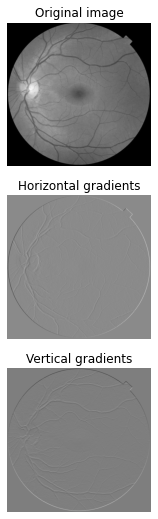

In [6]:
### Matplotlib incantations
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5, 9), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Original image')
ax1.set_adjustable('box')
ax2.axis('off')
ax2.imshow(gx, cmap=plt.cm.gray)
ax2.set_title('Horizontal gradients')
ax2.set_adjustable('box')
ax3.axis('off')
ax3.imshow(gy, cmap=plt.cm.gray)
ax3.set_title('Vertical gradients')
ax3.set_adjustable('box')

## Task 1. Design your code to compute diagonal gradient of the image used in the example and visualize it

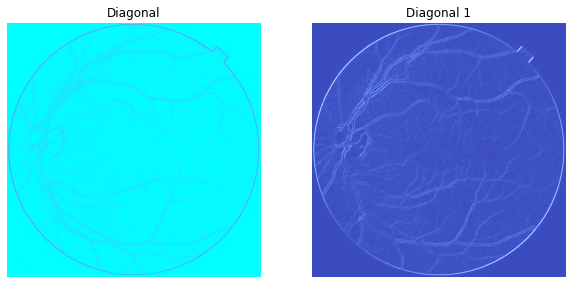

In [30]:
# write your code here
#Diagonal Gradient = Verticle Gradient + Horizontal Gradient
# Diagonal Gradient = (G = sqrt(gx^2 + gy^2 )) or (G= abs(gx+gy))

#Verticle Gradient 
gy = np.empty(image.shape, dtype=np.double)
gy[0, :] = 0
gy[-1, :] = 0
gy[1:-1, :] = image[:-2, :] - image[2:, :]
#Horizontal Gradient
gx = np.empty(image.shape, dtype=np.double)
gx[:, 0] = 0
gx[:, -1] = 0
gx[:, 1:-1] = image[:, :-2] - image[:, 2:]

#Diagonal Gradient 
diag = np.sqrt((gx**2) + (gy**2))
diag1 = np.abs((gx) + (gy))

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 9), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(diag ,cmap=plt.cm.cool)
ax1.set_title('Diagonal')
ax1.set_adjustable('box')
ax2.axis('off')
ax2.imshow(diag1,cmap=plt.cm.coolwarm)
ax2.set_title('Diagonal 1')
ax2.set_adjustable('box')



## **Question 1**. Explain why we don't directly use the simplest image features (color or number of pixels)

**Answer to Q1**: type your answer here

-> we don't use color and pixel to calculate as those features to classify the model as these features are not much important features in classifing the image.

-> Here we use lines,boundries to classify the image which helps in getting more important features. 

---

## (Tutorial) HOG image features

In [12]:
# read image and convert it to grayscale
image = color.rgb2gray(data.chelsea())
# extract HOG features from the input image with predefined parameters
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True)

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

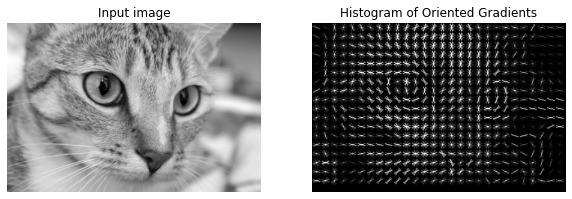

In [13]:
# visualize the original image and the hog features
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_adjustable('box')

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
ax2.set_adjustable('box')

## Task 2. ORB keypoints extraction and visualization
Apart from HOG image features, another popular image feature is ORB.<br>
Please extract keypoints from the image used in HOG example using on ORB features and visualize the keypoints on the original image

In [6]:
import imghdr
from PIL import Image as im

from skimage import data
from skimage import transform
from skimage.feature import (match_descriptors, corner_harris,
                             corner_peaks, ORB, plot_matches)
from skimage.color import rgb2gray

descriptor_extractor = ORB(n_keypoints=200)
image = rgb2gray(data.chelsea())
image2 = transform.rotate(image, 180)
change_image = transform.AffineTransform(scale=(1.3, 1.1), rotation=0.5,
                                  translation=(0, -200))
image3 = transform.warp(image, change_image)

descriptor_extractor.detect_and_extract(image)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(image2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(image3)
keypoints3 = descriptor_extractor.keypoints
descriptors3 = descriptor_extractor.descriptors

matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)

match13=match_descriptors(descriptors1,descriptors3,cross_check=True)


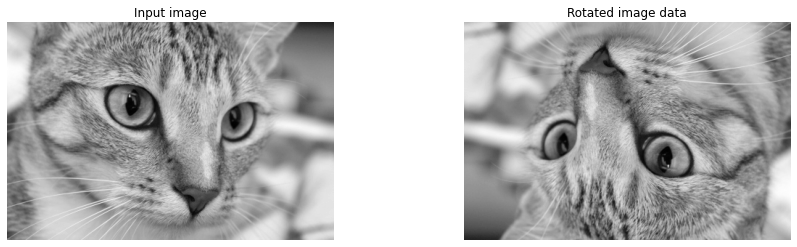

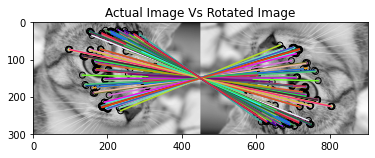

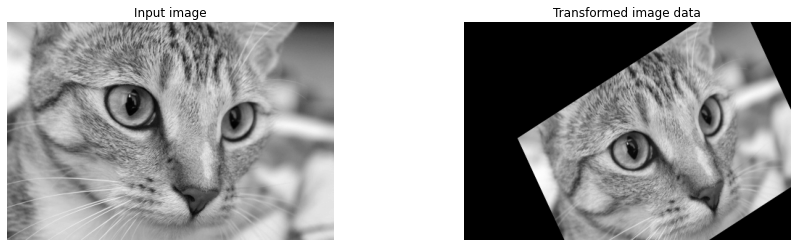

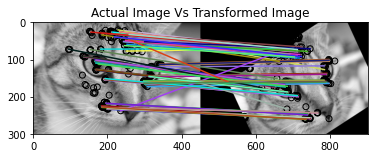

In [36]:
# visualize the original image and the hog features
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,4), sharex=True, sharey=True)



ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_adjustable('box')

ax2.axis('off')
ax2.imshow(image2, cmap=plt.cm.gray)
ax2.set_title('Rotated image data')
ax2.set_adjustable('box')

fig, ax = plt.subplots(nrows=1)
ax.set_title("Actual Image Vs Rotated Image")
plot_matches(ax, image, image2, keypoints1, keypoints2, matches12)



fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_adjustable('box')

ax2.axis('off')
ax2.imshow(image3, cmap=plt.cm.gray)
ax2.set_title('Transformed image data')
ax2.set_adjustable('box')



fig, ax = plt.subplots(nrows=1)
ax.set_title("Actual Image Vs Transformed Image")
plot_matches(ax, image, image3, keypoints1, keypoints3, match13)



## (Tutorial) Bag-of-Visual-Words
In the tutorial code, we create the code words only based on one image

In [37]:
# defining feature extractor that we want to use (ORB feature used in this extractor)
def features(image):
    extractor = cv2.ORB_create()
    keypoints, descriptors = extractor.detectAndCompute(image, None)
    return keypoints, descriptors

In [38]:
# builing visual words histogram based on the descriptors of the image and the clustering algorithm
def build_histogram(descriptor_list, cluster_alg):
    histogram = np.zeros(len(cluster_alg.cluster_centers_))
    cluster_result =  cluster_alg.predict(descriptor_list)
    for i in cluster_result:
        histogram[i] += 1.0
    return histogram

In [39]:
# Clustring the bag-of-visual-words by Kmeans method
from sklearn.cluster import KMeans
img = data.chelsea()
kmeans = KMeans(n_clusters = 30)
kp, descriptor_list = features(img)
kmeans.fit(descriptor_list)
images = []
images.append(img)
preprocessed_image = []
for image in images:
      # image = gray(image)
      keypoint, descriptor = features(image)
      if (descriptor is not None):
          histogram = build_histogram(descriptor, kmeans)
          preprocessed_image.append(histogram)

Text(0.5, 1.0, 'The histogram of visual words')

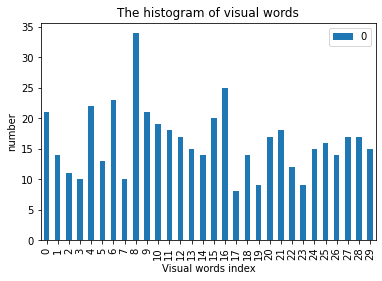

In [40]:
import pandas as pd
df = pd.DataFrame(preprocessed_image[0])
df.plot.bar()
#plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Visual words index')
plt.ylabel('number')
plt.title('The histogram of visual words')

## Task 3. Bag-of-Visual-Words for multiple images
Create your bag-of-visual-words with 10 images and visualize the histogram of visual words. The 10 images belong to one category(dog, cat, bike, etc.)

In [41]:
#Google Drive Connectivity 

from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [45]:
pathColab='/content/gdrive/MyDrive/AI Projects/Feature Engineering/ICE 5/'

In [58]:
# wirte your code here
# Clustring the bag-of-visual-words by Kmeans method
from sklearn.cluster import KMeans
import os

img = data.chelsea()
kmeans = KMeans(n_clusters = 30)
kp, descriptor_list = features(img)
kmeans.fit(descriptor_list)
images = []
for i in range(9):
  images.append(cv2.imread(os.path.join(pathColab,str(i),'.jpeg')))
images.append(img)
print ("Total images in list :",len(images))
preprocessed_image = []
for image in images:
      # image = gray(image)
      keypoint, descriptor = features(image)
      if (descriptor is not None):
          histogram = build_histogram(descriptor, kmeans)
          preprocessed_image.append(histogram)


Total images in list : 10


Text(0.5, 1.0, 'The histogram of visual words')

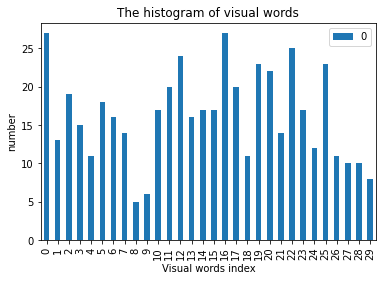

In [55]:
import pandas as pd
df = pd.DataFrame(preprocessed_image[0])
df.plot.bar()
#plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Visual words index')
plt.ylabel('number')
plt.title('The histogram of visual words')

## Question 2. Recall that the feature scaling does not have a large effect on classification accuracy (tf-idf). How about the effect of feature scaling in Bag-of-Visual-Words? Explain it.

**Answer to Q2**: type your answer here
-> Using tf-idf the word count increases and decreases based on the limit size. 

-> The same is used in Bag of Visual words hence the effect is negative. 



---